# BOSTON HOUSE PRICE PREDICTION

## Importing the dependent libraries/functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Importing the Boston House Price Datasets

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
print(house_price_dataset)  # here we are printing the data's in the dataset "house_price_dataset"

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Now we are turning the dataset into a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
# Printing the first 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Now we are adding the target column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [7]:
# Now again print the first 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# checking number of rows and columns in the DataFrame
house_price_dataframe.shape

(506, 14)

In [9]:
# check for the missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

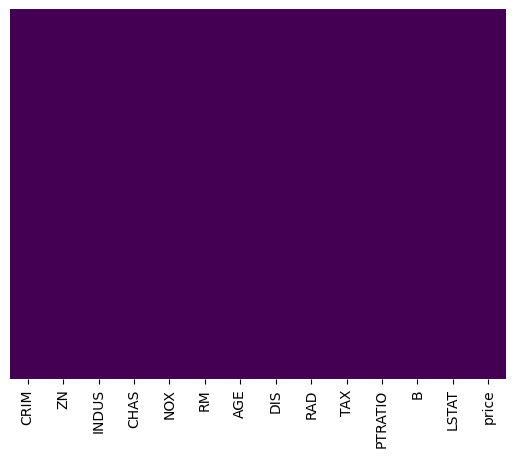

In [10]:
# visualizaiton for the missing values 

sns.heatmap(house_price_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# Statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Understanding Datasets by Graphs

<AxesSubplot:xlabel='RAD', ylabel='count'>

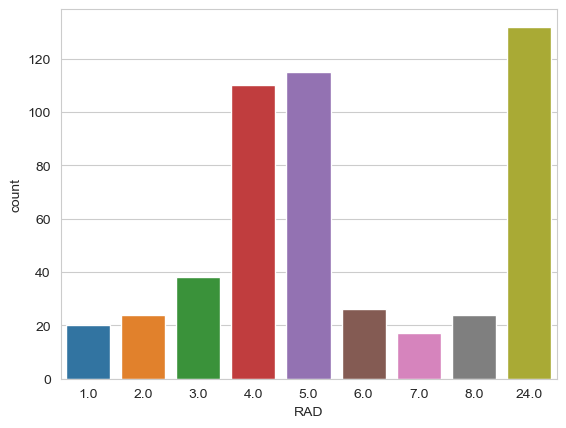

In [12]:
# Counting for rad values

sns.set_style('whitegrid')
sns.countplot(x='RAD', data=house_price_dataframe)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

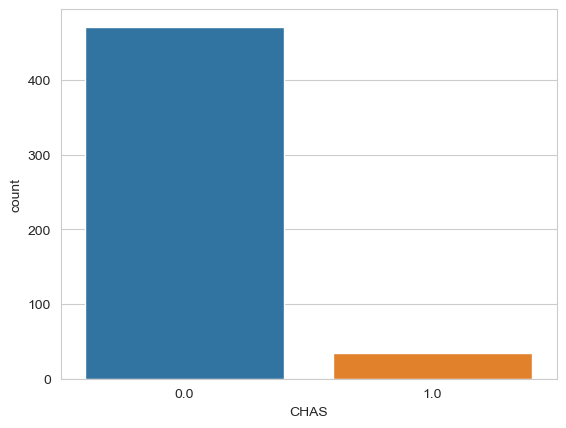

In [13]:
# Counting for chas feature

sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=house_price_dataframe)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

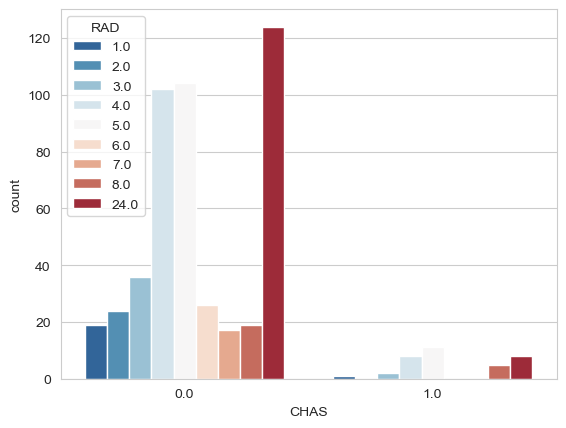

In [14]:
# chas data

sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=house_price_dataframe,palette='RdBu_r')

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

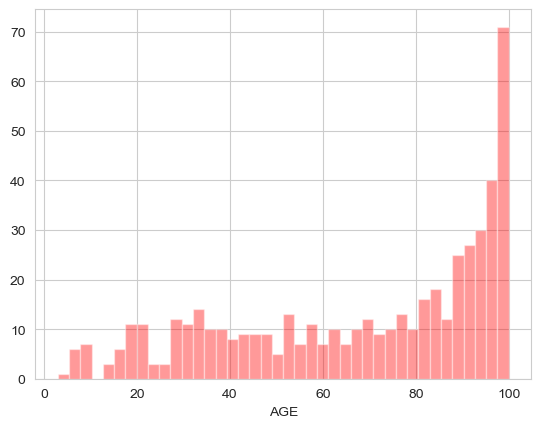

In [15]:
# House’s age feature understanding

sns.distplot(house_price_dataframe['AGE'].dropna(),kde=False,color='red',bins=40)

<AxesSubplot:xlabel='CRIM'>

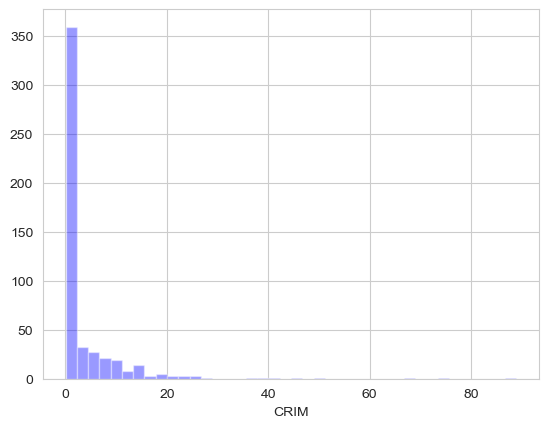

In [16]:
# Crim Rate

sns.distplot(house_price_dataframe['CRIM'].dropna(),kde=False,color='blue',bins=40)

<AxesSubplot:xlabel='RM'>

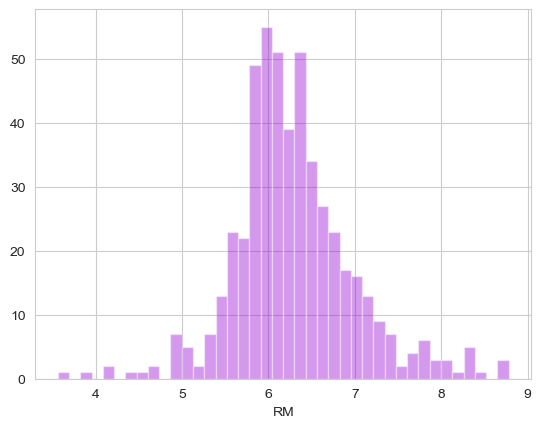

In [17]:
# Understanding Number of Rooms into the house

sns.distplot(house_price_dataframe['RM'].dropna(),kde=False,color='darkviolet',bins=40)

## Correlation between various features of the dataset
      -> Positive and Negative correlation

In [18]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

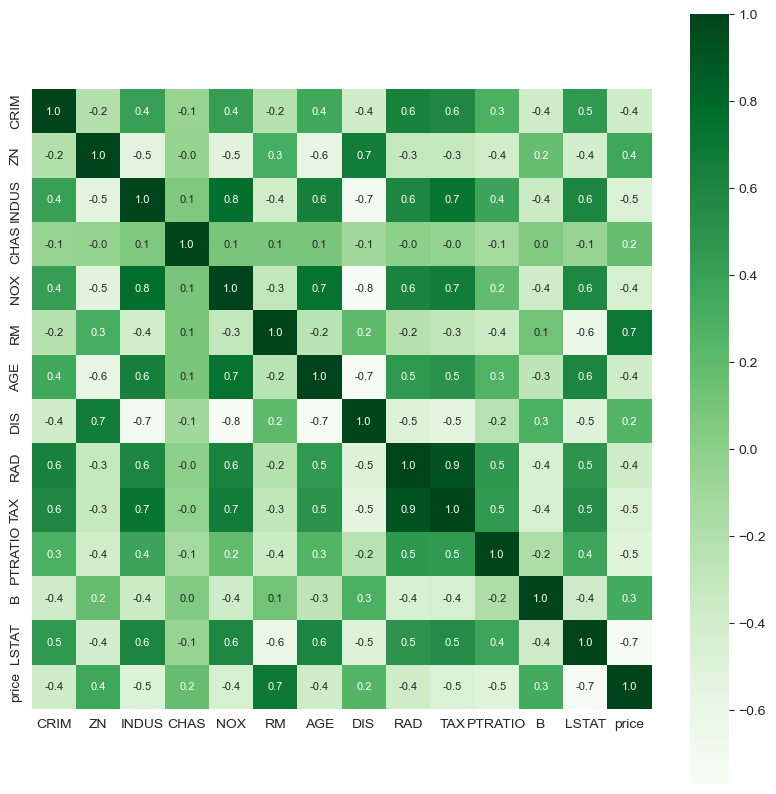

In [19]:
# Here we are gonna represent the DataFrame as a "HEATMAP"
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

## Splitting the Data and Target

In [20]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [21]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

## Split intoTrain and Test Data

In [22]:
# Here we are gonna train and test the given data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [23]:
# Here we are checking the instances in the train and test data

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (354, 13) (152, 13)


## Model fitting

In [24]:
#Fitting our model in the linear regression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
Y_pred = model.predict(X_train)

## Accuracy predicton for linear regression 

In [26]:
print("Training Accuracy : ",model.score(X_train,Y_train)*100)

Training Accuracy :  71.03879080674731


In [27]:
print("Testing Accuracy : ",model.score(X_test,Y_test)*100)

Testing Accuracy :  78.3629538507627


## Model prediction

In [28]:
print("Model Accuracy : ",r2_score(Y,model.predict(X))*100)

Model Accuracy :  73.45724510269977


### Visualization of predicted model

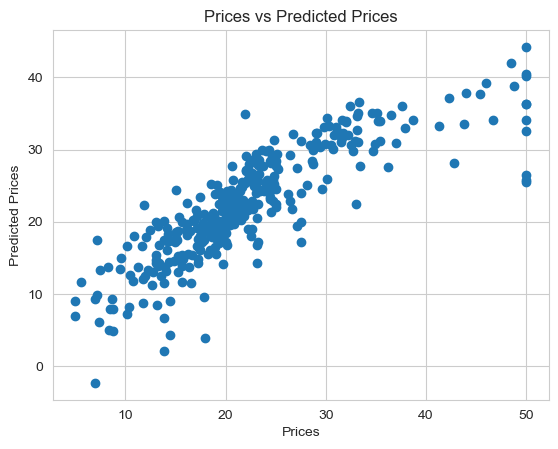

In [29]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

### Checking Residuals

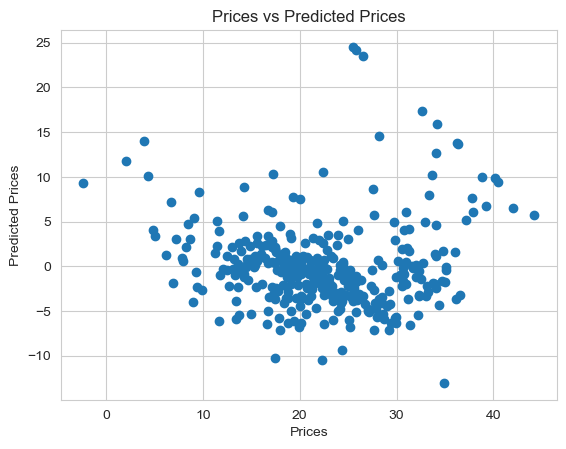

In [30]:
plt.scatter(Y_pred,Y_train-Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

### Predicted vs Residuals (Normality of errors) 

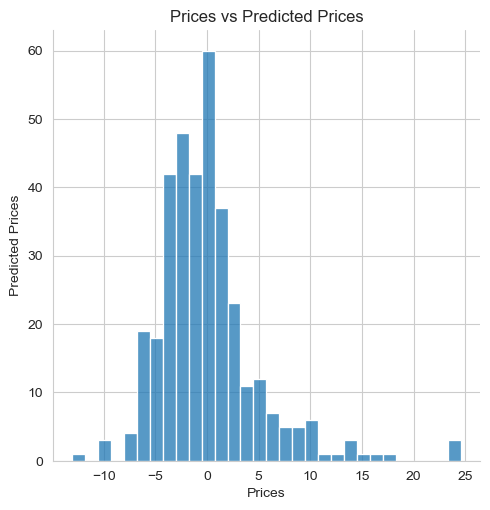

In [31]:
sns.displot(Y_train-Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

## Random Forest Regressor

       For better Accuracy

In [32]:
#Assigning values
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Model Fitting

In [34]:
#Fitting our model in the Random Forest regression
Ran = RandomForestRegressor()
Ran.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
Y_pred = Ran.predict(X_train)

## Accuracy predicton for  RandomForest Regression

In [36]:
print("Training Accuracy : ",Ran.score(X_train,Y_train)*100)

Training Accuracy :  97.95083824359554


In [37]:
print("Testing Accuracy : ",Ran.score(X_test,Y_test)*100)

Testing Accuracy :  90.15501063624228


## Visualization of predicted model

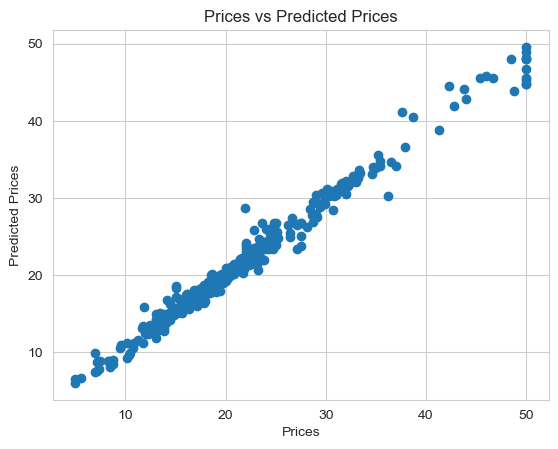

In [38]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()